In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
swiss = pd.read_csv('../data/swiss.csv').drop('Unnamed: 0', axis=1)

In [3]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
0,80.2,17.0,15,12,9.96,22.2
1,83.1,45.1,6,9,84.84,22.2
2,92.5,39.7,5,5,93.40,20.2
3,85.8,36.5,12,7,33.77,20.3
4,76.9,43.5,17,15,5.16,20.6


In [4]:
swiss.rename(columns={'Infant.Mortality': 'Infant_Mortality'}, inplace=True)

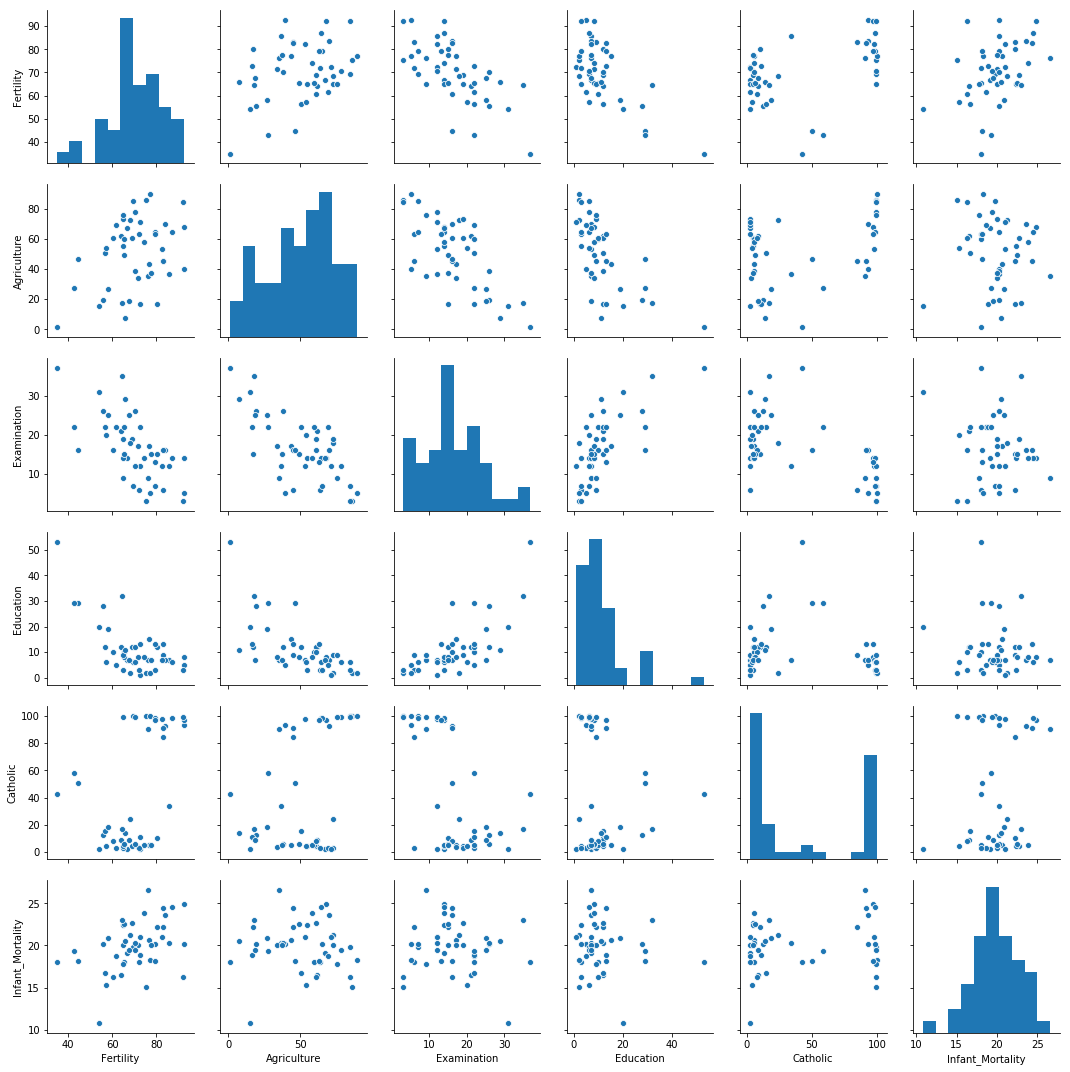

In [5]:
sns.pairplot(swiss)

In [6]:
swiss.corr()

,Fertility,Agriculture,Examination,Education,Catholic,Infant_Mortality
Fertility,1.000000,0.353079,-0.645883,-0.663789,0.463685,0.416556
Agriculture,0.353079,1.000000,-0.686542,-0.639523,0.401095,-0.060859
Examination,-0.645883,-0.686542,1.000000,0.698415,-0.572742,-0.114022
Education,-0.663789,-0.639523,0.698415,1.000000,-0.153859,-0.099322
Catholic,0.463685,0.401095,-0.572742,-0.153859,1.000000,0.175496
Infant_Mortality,0.416556,-0.060859,-0.114022,-0.099322,0.175496,1.000000


### Regress Fertility on all predictors

In [7]:
predictors = swiss.columns.difference(['Fertility'])
formula = 'Fertility ~ ' + '+'.join(predictors)
lm1 = smf.ols(formula, data=swiss).fit()

In [8]:
formula

'Fertility ~ Agriculture+Catholic+Education+Examination+Infant_Mortality'

In [9]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Fertility   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     19.76
Date:                Mon, 25 Feb 2019   Prob (F-statistic):           5.59e-10
Time:                        14:34:28   Log-Likelihood:                -156.04
No. Observations:                  47   AIC:                             324.1
Df Residuals:                      41   BIC:                             335.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           66.9152     10.706      6.250      0.000      45.294      88.536
Agriculture         -0.1721      0.070     -2.448      0.019      -0.314      -0.030
Catholic             0.1041      0.035      2.953      0.005       0.033       0.175
Education           -0.8709      0.183     -4.758      0.000      -1.241      -0.501
Examination         -0.2580      0.254     -1.016      0.315      -0.771       0.255
Infant_Mortality     1.0770      0.382      2.822      0.007       0.306       1.848
==============================================================================
Omnibus:                        0.058   Durbin-Watson:                   1.454
Prob(Omnibus):                  0.971   Jarque-Bera (JB):                0.155
Skew:                          -0.077   Prob(JB):                        0.925
Kurtosis:                       2.764   Cond. No.                         807.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Regress Fertility on Agriculture

In [10]:
lm2 = smf.ols('Fertility ~ Agriculture', data=swiss).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Fertility   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     6.409
Date:                Mon, 25 Feb 2019   Prob (F-statistic):             0.0149
Time:                        14:34:36   Log-Likelihood:                -181.73
No. Observations:                  47   AIC:                             367.5
Df Residuals:                      45   BIC:                             371.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      60.3044      4.251     14.185      0.000      51.742      68.867
Agriculture     0.1942      0.077      2.532      0.015       0.040       0.349
==============================================================================
Omnibus:                        0.295   Durbin-Watson:                   0.646
Prob(Omnibus):                  0.863   Jarque-Bera (JB):                0.481
Skew:                          -0.095   Prob(JB):                        0.786
Kurtosis:                       2.542   Cond. No.                         137.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Simulated Example

In [11]:
np.random.seed(1)

In [12]:
n = 100
x2 = np.arange(1, n+1)
x1 = 0.01 * x2 + np.random.uniform(-0.1, 0.1, n)

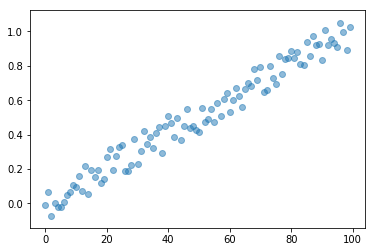

In [13]:
plt.scatter(range(len(x1)), x1, alpha=0.5)

In [14]:
y = -x1 + x2 + np.random.normal(scale=0.01, size=n)

In [15]:
dummy_data = pd.DataFrame({'y': y, 'x1': x1, 'x2': x2})

In [16]:
lm3 = smf.ols('y ~ x1', data=dummy_data).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     2511.
Date:                Mon, 25 Feb 2019   Prob (F-statistic):           1.20e-71
Time:                        14:34:59   Log-Likelihood:                -313.04
No. Observations:                 100   AIC:                             630.1
Df Residuals:                      98   BIC:                             635.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6016      1.082      3.329      0.001       1.455       5.748
x1            92.3921      1.844     50.106      0.000      88.733      96.051
==============================================================================
Omnibus:                       13.142   Durbin-Watson:                   2.137
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                4.073
Skew:                          -0.040   Prob(JB):                        0.130
Kurtosis:                       2.014   Cond. No.                         4.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
lm4 = smf.ols('y ~ x1 + x2', data=dummy_data).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.978e+08
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        14:34:59   Log-Likelihood:                 330.08
No. Observations:                 100   AIC:                            -654.2
Df Residuals:                      97   BIC:                            -646.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0004      0.002     -0.219      0.827      -0.004       0.003
x1            -1.0175      0.016    -65.383      0.000      -1.048      -0.987
x2             1.0002      0.000   6115.642      0.000       1.000       1.001
==============================================================================
Omnibus:                        2.732   Durbin-Watson:                   2.222
Prob(Omnibus):                  0.255   Jarque-Bera (JB):                2.108
Skew:                          -0.265   Prob(JB):                        0.349
Kurtosis:                       3.475   Cond. No.                     1.00e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
ey = smf.ols('y ~ x2', data=dummy_data).fit().resid
ex = smf.ols('x1 ~ x2', data=dummy_data).fit().resid

In [19]:
lm_resid = smf.ols('ey ~ ex', data={'ey': ey, 'ex': ex}).fit()

In [20]:
lm_resid.params

Intercept   -1.915308e-14
ex          -1.017537e+00
dtype: float64

In [21]:
sample_xs = [ex.min(), ex.max()]
sample_ys = lm_resid.predict({'ex': sample_xs})

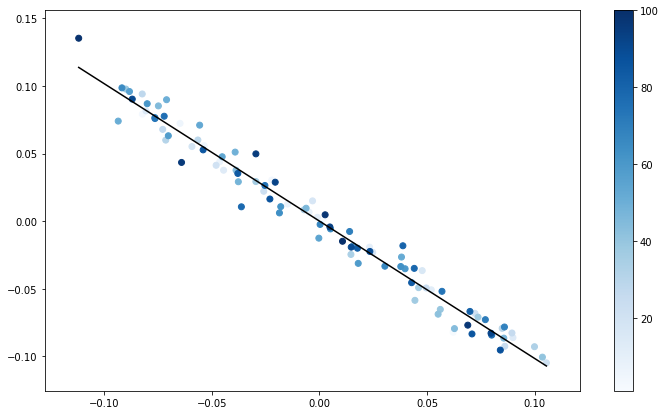

In [22]:
fig, ax = plt.subplots(figsize=(12, 7))
im = ax.scatter(ex, ey, c=x2, cmap=plt.get_cmap('Blues'))
ax.plot(sample_xs, sample_ys, c='black')
fig.colorbar(im, ax=ax)